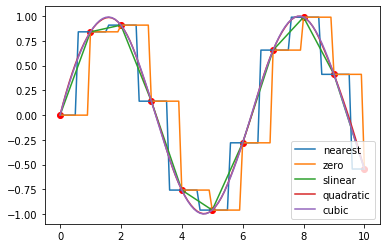

In [1]:
# -*-coding:utf-8 -*-
#一维插值#
import numpy as np
from scipy import interpolate
import pylab as pl

x=np.linspace(0,10,11)
#x=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
y=np.sin(x)
xnew=np.linspace(0,10,101)
pl.plot(x,y,"ro")

for kind in ["nearest","zero","slinear","quadratic","cubic"]:#插值方式
    #"nearest","zero"为阶梯插值
    #slinear 线性插值
    #"quadratic","cubic" 为2阶、3阶B样条曲线插值
    f=interpolate.interp1d(x,y,kind=kind)
    # ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=str(kind))
pl.legend(loc="lower right")
pl.show()

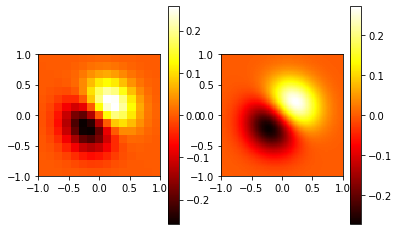

In [3]:

#一维插值#
# -*- coding: utf-8 -*-
"""
演示二维插值。
"""
import numpy as np
from scipy import interpolate
import pylab as pl
import matplotlib as mpl

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为15*15的网格
y,x= np.mgrid[-1:1:15j, -1:1:15j]

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值
#print len(fvals[0])

#三次样条二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值

# 绘图
# 为了更明显地比较插值前后的区别，使用关键字参数interpolation='nearest'
# 关闭imshow()内置的插值运算。
pl.subplot(121)
im1=pl.imshow(fvals, extent=[-1,1,-1,1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")#pl.cm.jet
#extent=[-1,1,-1,1]为x,y范围  favals为
pl.colorbar(im1)

pl.subplot(122)
im2=pl.imshow(fnew, extent=[-1,1,-1,1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im2)
pl.show()


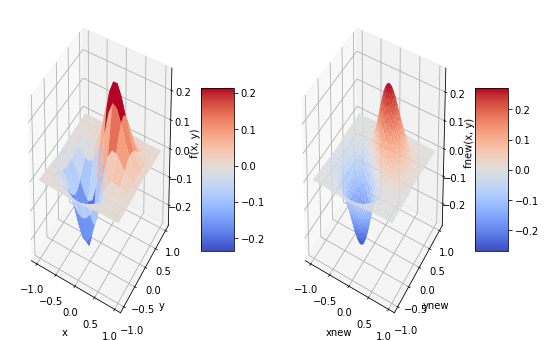

In [4]:
# -*- coding: utf-8 -*-
"""
演示二维插值。
"""
# -*- coding: utf-8 -*-
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)#20*20的网格数据

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

fig = plt.figure(figsize=(9, 6))
#Draw sub-graph1
ax=plt.subplot(1, 2, 1,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

#二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  np.shape(fnew) is 100*100
xnew, ynew = np.meshgrid(xnew, ynew)
ax2=plt.subplot(1, 2, 2,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注

plt.show()


In [5]:
import pyecharts.options as opts
from pyecharts.charts import Line
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt   # 导入模块 matplotlib.pyplot，并简写成 plt 
import networkx as nx 
x=[0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
y=[0.114,0.102,0.203,0.098,0.132,0.042,0.108,0.216]

line=(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=x)
    .add_yaxis(
        series_name="sensitivity analysis",
        y_axis=y,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
)
line.render_notebook()

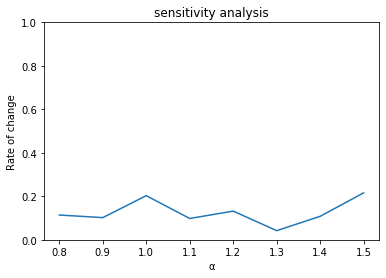

In [14]:
from matplotlib.pyplot import MultipleLocator
#y_major_locator=MultipleLocator(100)
#ax=plt.gca()
#ax.yaxis.set_major_locator(y_major_locator)
plt.plot(x,y) 
plt.xlabel('α')
plt.ylabel('Rate of change')
plt.ylim(0,1)
#轴的标题
plt.title('sensitivity analysis')
plt.show()

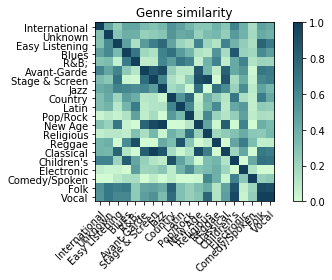

In [17]:
heat=pd.read_csv(r"heatmap_fix.csv",header=0)
genre=heat['Unnamed: 0'].tolist()
heat.set_index(['Unnamed: 0'],inplace=True)
usedf=heat.T

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

for ge in genre:
    da=usedf[ge].tolist()
    newda=normalization(da)
    usedf[ge]=newda
    
n=np.array(usedf)
from palettable.cartocolors.sequential import DarkMint_4
# 这里是创建一个数据
vegetables = genre
farmers = genre

harvest = n

# 这里是创建一个画布
fig, ax = plt.subplots()
plt.figure(1,figsize=(6,6)) 
im = ax.imshow(harvest,cmap=DarkMint_4.mpl_colormap)

# 这里是修改标签
# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# 因为x轴的标签太长了，需要旋转一下，更加好看
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# 添加每个热力块的具体数值
# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
#    for j in range(len(farmers)):
#        text = ax.text(j, i, harvest[i, j],
#                       ha="center", va="center", color="w")
ax.set_title("Genre similarity")
fig.tight_layout()

plt.colorbar(im)
plt.show()